In [2]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv('C:/Users/vaibh/Downloads/data_science_job.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [7]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [8]:
df.shape

(19158, 13)

In [11]:
col=[var for var in df.columns if df[var].isnull().mean() < .05 and df[var].isnull().mean()>0]
col

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [13]:
df[col].head()

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
3,0.789,NaN,Graduate,0.0,52.0
4,0.767,no_enrollment,Masters,20.0,8.0


In [16]:
len(df[col].dropna())/len(df)

0.8968577095730244

In [17]:
new_df=df[col].dropna()

In [19]:
df.shape , new_df.shape

((19158, 13), (17182, 5))

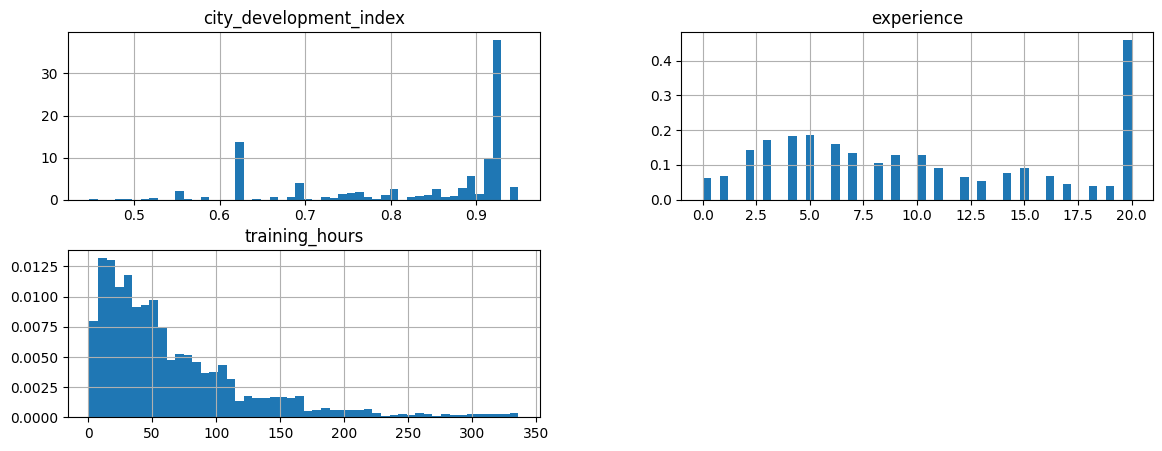

In [26]:
import matplotlib.pyplot as plt

new_df.hist(bins=50,density=True,figsize=(14,5))
plt.show()

<Axes: >

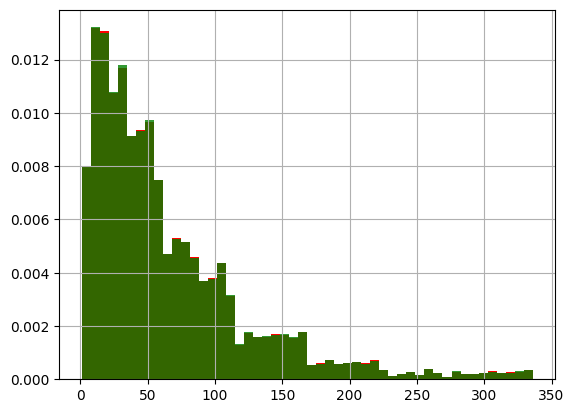

In [32]:
fig=plt.figure()
ax=fig.add_subplot(111)

# original data 
df['training_hours'].hist(bins=50,ax=ax,density=True,color='red')  

#  data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['training_hours'].hist(bins=50, ax=ax , color='green', density=True,alpha=.8)

<Axes: ylabel='Density'>

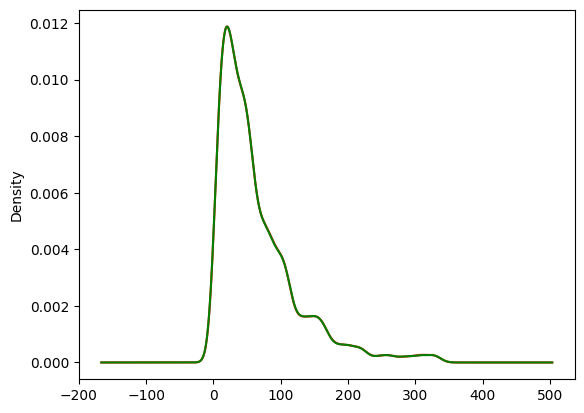

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].plot.density(color='red')

# data after cca
new_df['training_hours'].plot.density(color='green')

In [34]:
# it is over lap to each other

<Axes: >

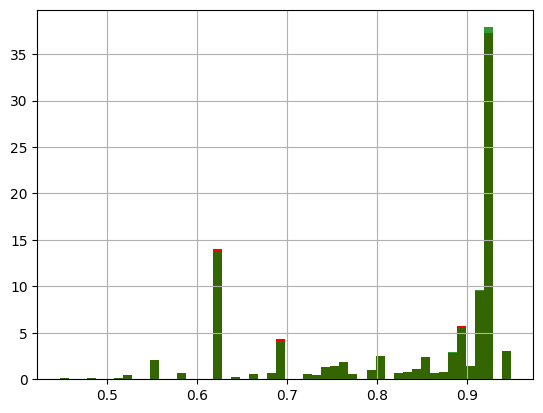

In [39]:
fig=plt.figure()
ax=fig.add_subplot(111)


# before cca original data
df['city_development_index'].hist(bins=50,ax=ax, density=True,color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions

new_df['city_development_index'].hist(bins=50,ax=ax,density=True,color='green',alpha=.8)

<Axes: ylabel='Density'>

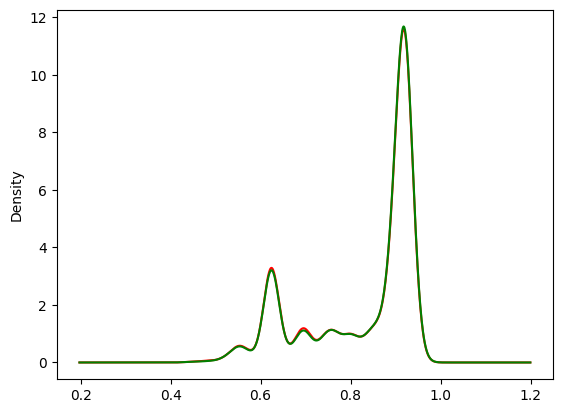

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].plot.density(color='red')

# data after cca
new_df['city_development_index'].plot.density(color='green')

<Axes: >

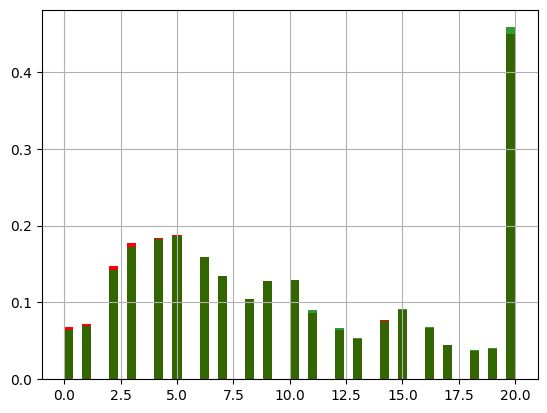

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['experience'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<Axes: ylabel='Density'>

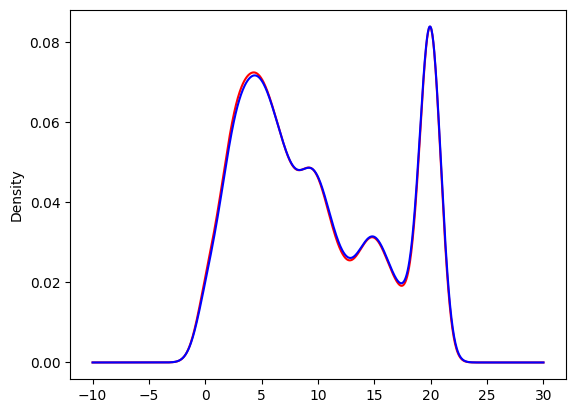

In [48]:
fig=plt.figure()
ax=fig.add_subplot(111)

# original data
df['experience'].plot.density(color='red')

# after cca
new_df['experience'].plot.density(color='blue')

In [59]:
tem=pd.concat([
    
    # percentage of observation per category,original column
    df['enrolled_university'].value_counts() / len(df),
    
    #  percentage of observtion per category, cca data
    
    new_df['enrolled_university'].value_counts()/len(new_df)

],
axis=1)





In [60]:
tem

,count,count
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [61]:
tem.columns=['original','cca']

In [62]:
tem

,original,cca
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [64]:
temp=pd.concat([
    
    # percentage of observation per category , original data

    df['education_level'].value_counts()/len(df),
    
    # percentage of observation per category , cca data
    
    
    new_df['education_level'].value_counts()/len(df)
],axis=1)

In [65]:
temp.columns=['original','cca']

In [66]:
temp

,original,cca
education_level,,
Graduate,0.605387,0.555904
Masters,0.227633,0.209938
High School,0.105282,0.096304
Phd,0.021610,0.019835
Primary School,0.016077,0.014876
